#### AAYUSH GOYAL

#### EE18BTECH11001

#### Assignment 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import pandas as pd
from scipy.stats import t

### PROBLEM 1

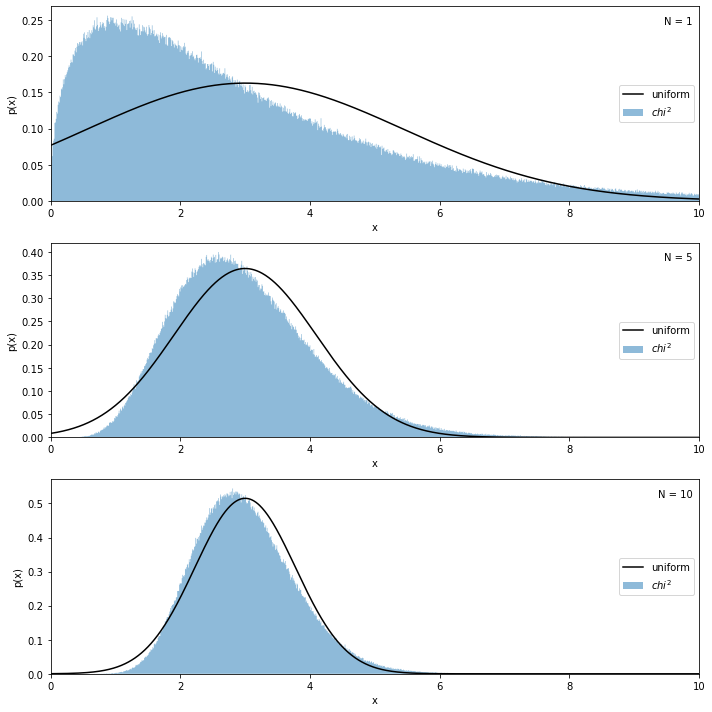

In [34]:
N = [1, 5, 10]
dof = 3
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0.05)
ax = fig.add_subplot(3, 1, 1)

for _ in range(len(N)):
    ax = fig.add_subplot(3, 1, _+1)
    x = np.random.chisquare(dof,  (N[_] , int(1e6)))
    x_i = x.mean(0)
    ax.hist(x_i, bins=np.linspace(0,10,1000), histtype='stepfilled', 
            alpha=0.5, density=True, label = '$chi^{2}$')
    mu = x_i.mean()
    sigma = np.sqrt(2.0*dof/N[_])
    lin_space = np.linspace(0, 10, 1000)
    dist = norm(mu, sigma)
    ax.plot(lin_space, dist.pdf(lin_space), '-k', label='uniform')
    ax.set_xlim(0.0, 10)
    plt.legend(loc = 'center right')
    ax.text(0.99, 0.95, "N = " + str(N[_]), ha='right', va='top', transform=ax.transAxes)
    ax.set_xlabel('x')
    ax.set_ylabel('p(x)')
plt.tight_layout()
plt.show()

### PROBLEM 2

There is correlation our data

As we increase the redshift the average luminosity also increases

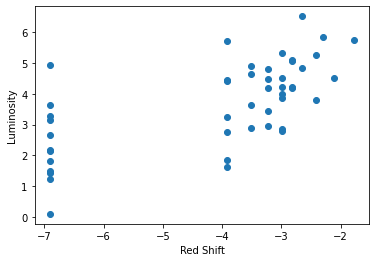

In [7]:
A = np.genfromtxt("test.dat")
plt.scatter(np.log(A[:,1]) ,np.log(A[:,0]))
plt.xlabel("Red Shift")
plt.ylabel("Luminosity")
plt.show()

In [10]:
spear,p_spear = stats.spearmanr(A[:,0] , A[:,1])
pear,p_pear = stats.pearsonr(A[:,0] , A[:,1])
ken,p_ken = stats.kendalltau(A[:,0] , A[:,1])
print("Spearman: ", "Correlation coeff = ", spear, ", p-value = ", p_spear)
print("Pearson: ", "Correlation coeff = ", pear, ", p-value = ", p_pear)
print("Kendall-tau: ", "Correlation coeff = ", ken, ", p-value = ", p_ken)

Spearman:  Correlation coeff =  0.6596325957535455 , p-value =  6.166489759080966e-07
Pearson:  Correlation coeff =  0.5144497852670242 , p-value =  0.0002546471657612425
Kendall-tau:  Correlation coeff =  0.5029584682704178 , p-value =  2.969686227473415e-06


### PROBLEM 3

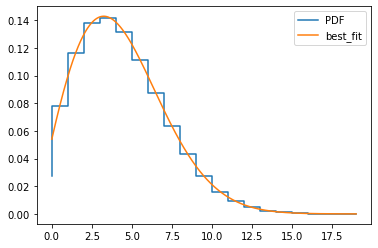

In [33]:
freq = np.array([2.75,7.80,11.64,13.79,14.20,13.15,11.14,8.72,6.34,
                 4.30,2.73,1.62,0.91,0.48,0.24,0.11,0.05,0.02,0.01,0.00])/100
plt.step(np.linspace(0,19,20), freq, label='PDF')
d = stats.weibull_min(2, -1, 6)
plt.plot(np.linspace(0, 19, 1000), d.pdf(np.linspace(0, 19, 1000)), label='best_fit')
plt.legend()
plt.show()

### PROBLEM 4

In [13]:
X1 = norm.rvs(0,1,1000)
X2 = norm.rvs(0,1,1000)
pear , p_pear = stats.pearsonr(X1,X2)
t_ = -abs(pear)*np.sqrt(998/(1-(-abs(pear))**2))
p_t = 2*stats.t.cdf(t_ , 998)
print("Pearson correlation coefficient : ", pear)
print("Pearson p value : ", p_pear)
print("P Value using student-t :", p_t)

Pearson correlation coefficient :  -0.004524144150248001
Pearson p value :  0.8863787973969289
P Value using student-t : 0.8863787973968902
